In [2]:
from skmultilearn.dataset import load_dataset
import pandas as pd

from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC

In [3]:
X_train, y_train, feature_names, label_names = load_dataset("emotions", "train")
X_test, y_test, _, _ = load_dataset("emotions", "test")

emotions:train - exists, not redownloading
emotions:test - exists, not redownloading


In [4]:
print(X_train)

  (0, 0)	0.034741
  (0, 1)	0.089665
  (0, 2)	0.091225
  (0, 3)	-73.302422
  (0, 4)	6.215179
  (0, 5)	0.615074
  (0, 6)	2.03716
  (0, 7)	0.804065
  (0, 8)	1.301409
  (0, 9)	0.558576
  (0, 10)	0.672063
  (0, 11)	0.783788
  (0, 12)	0.76664
  (0, 13)	0.458712
  (0, 14)	0.530384
  (0, 15)	0.812429
  (0, 16)	0.028851
  (0, 17)	0.129039
  (0, 18)	0.039614
  (0, 19)	5.762173
  (0, 20)	1.636819
  (0, 21)	1.170034
  (0, 22)	1.051511
  (0, 23)	0.764163
  (0, 24)	0.642705
  (0, 25)	0.617868
  (0, 26)	0.510265
  (0, 27)	0.566213
  (0, 28)	0.509149
  (0, 29)	0.477275
  (0, 30)	0.505073
  (0, 31)	0.463535
  (0, 32)	0.013519
  (0, 33)	0.050591
  (0, 34)	0.009025
  (0, 35)	8.156257
  (0, 36)	1.077167
  (0, 37)	0.624711
  (0, 38)	0.810244
  (0, 39)	0.399568
  (0, 40)	0.279947
  (0, 41)	0.314215
  (0, 42)	0.231439
  (0, 43)	0.345401
  (0, 44)	0.285389
  (0, 45)	0.210613
  (0, 46)	0.321896
  (0, 47)	0.290551
  (0, 48)	0.022774
  (0, 49)	0.095801
  (0, 50)	0.015057
  (0, 51)	4.748694
  (0, 52)	0.536378
  (

In [5]:
feature_names[:10]

[('Mean_Acc1298_Mean_Mem40_Centroid', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_Rolloff', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_Flux', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_0', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_1', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_2', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_3', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_4', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_5', 'NUMERIC'),
 ('Mean_Acc1298_Mean_Mem40_MFCC_6', 'NUMERIC')]

In [6]:
X_train = X_train.toarray()
X_train_df = pd.DataFrame(data=X_train, columns=feature_names)

In [7]:
X_train_df

,"(Mean_Acc1298_Mean_Mem40_Centroid, NUMERIC)","(Mean_Acc1298_Mean_Mem40_Rolloff, NUMERIC)","(Mean_Acc1298_Mean_Mem40_Flux, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_0, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_1, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_2, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_3, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_4, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_5, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_6, NUMERIC)",...,"(Std_Acc1298_Std_Mem40_MFCC_11, NUMERIC)","(Std_Acc1298_Std_Mem40_MFCC_12, NUMERIC)","(BH_LowPeakAmp, NUMERIC)","(BH_LowPeakBPM, NUMERIC)","(BH_HighPeakAmp, NUMERIC)","(BH_HighPeakBPM, NUMERIC)","(BH_HighLowRatio, NUMERIC)","(BHSUM1, NUMERIC)","(BHSUM2, NUMERIC)","(BHSUM3, NUMERIC)"
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,0.118630,0.094923,0.051035,68.0,0.014937,136.0,2.0,0.245457,0.105065,0.405399
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,0.070075,0.041565,0.295031,70.0,0.276366,140.0,2.0,0.343547,0.276366,0.710924
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,0.079917,0.085821,0.161574,61.0,0.000000,183.0,3.0,0.188693,0.045941,0.457372
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,0.129145,0.122330,0.043012,66.0,0.206562,132.0,2.0,0.102839,0.241934,0.351009
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,0.284196,0.189988,0.029308,100.0,0.144039,200.0,2.0,0.195196,0.310801,0.683817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386,0.065002,0.178495,0.079270,-56.297652,2.849084,0.898520,1.224303,0.215222,0.371932,0.275251,...,0.090018,0.071053,0.008454,91.0,0.016263,182.0,2.0,0.044070,0.037909,0.123335
387,0.016210,0.513427,0.094665,-68.799098,4.622023,1.375783,1.340068,0.957742,0.872255,0.585099,...,0.060160,0.047912,0.219090,70.0,0.361843,140.0,2.0,0.270276,0.438492,0.935467
388,0.042903,0.089283,0.080263,-71.474821,5.128890,0.529289,2.667867,0.155866,2.358098,-0.209229,...,0.194389,0.167148,0.081668,74.0,0.006261,148.0,2.0,0.366192,0.289227,0.661680
389,0.038987,0.059570,0.082053,-81.361592,5.949950,2.090330,2.507652,1.684529,1.025200,0.343319,...,0.131958,0.107033,0.089287,87.0,0.053862,174.0,2.0,0.581526,0.047156,0.774458


In [8]:
print(y_train)

  (0, 1)	1
  (0, 2)	1
  (1, 0)	1
  (1, 5)	1
  (2, 1)	1
  (2, 5)	1
  (3, 2)	1
  (4, 3)	1
  (5, 1)	1
  (5, 2)	1
  (6, 0)	1
  (6, 1)	1
  (7, 5)	1
  (8, 0)	1
  (8, 1)	1
  (9, 2)	1
  (9, 3)	1
  (9, 4)	1
  (10, 1)	1
  (10, 2)	1
  (11, 2)	1
  (12, 0)	1
  (13, 2)	1
  (13, 4)	1
  (14, 4)	1
  (15, 0)	1
  (15, 5)	1
  (16, 2)	1
  (16, 3)	1
  (16, 4)	1
  (17, 1)	1
  (17, 2)	1
  (18, 4)	1
  (18, 5)	1
  (19, 2)	1
  (19, 3)	1
  (19, 4)	1
  (20, 0)	1
  (20, 5)	1
  (21, 1)	1
  (22, 1)	1
  (23, 5)	1
  (24, 5)	1
  (25, 2)	1
  (25, 5)	1
  (26, 2)	1
  (27, 0)	1
  (27, 1)	1
  (27, 5)	1
  (28, 1)	1
  (29, 2)	1
  (30, 5)	1
  (31, 2)	1
  (31, 3)	1
  (32, 0)	1
  (32, 5)	1
  (33, 5)	1
  (34, 0)	1
  (34, 1)	1
  (35, 1)	1
  (35, 2)	1
  (36, 2)	1
  (36, 3)	1
  (36, 4)	1
  (37, 1)	1
  (37, 2)	1
  (38, 0)	1
  (38, 1)	1
  (39, 0)	1
  (39, 5)	1
  (40, 1)	1
  (41, 0)	1
  (41, 4)	1
  (42, 2)	1
  (42, 3)	1
  (42, 4)	1
  (43, 1)	1
  (43, 2)	1
  (44, 0)	1
  (44, 1)	1
  (45, 1)	1
  (45, 2)	1
  (46, 2)	1
  (46, 3)	1
  (46, 4)	

In [9]:
label_names

[('amazed-suprised', ['0', '1']),
 ('happy-pleased', ['0', '1']),
 ('relaxing-calm', ['0', '1']),
 ('quiet-still', ['0', '1']),
 ('sad-lonely', ['0', '1']),
 ('angry-aggresive', ['0', '1'])]

In [10]:
y_train = y_train.toarray()
y_train

array([[0, 1, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 1],
       ...,
       [0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0, 0]])

In [11]:
columns = [label[0] for label in label_names]

In [12]:
y_train_df = pd.DataFrame(data=y_train, columns=columns)

In [13]:
y_train_df

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0,1,1,0,0,0
1,1,0,0,0,0,1
2,0,1,0,0,0,1
3,0,0,1,0,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
386,0,0,0,0,0,1
387,1,0,0,0,0,1
388,0,1,1,0,0,0
389,0,0,0,1,1,0


In [14]:
X_test = X_test.toarray()
X_test_df = pd.DataFrame(data=X_test, columns=feature_names)

In [15]:
X_test_df

,"(Mean_Acc1298_Mean_Mem40_Centroid, NUMERIC)","(Mean_Acc1298_Mean_Mem40_Rolloff, NUMERIC)","(Mean_Acc1298_Mean_Mem40_Flux, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_0, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_1, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_2, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_3, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_4, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_5, NUMERIC)","(Mean_Acc1298_Mean_Mem40_MFCC_6, NUMERIC)",...,"(Std_Acc1298_Std_Mem40_MFCC_11, NUMERIC)","(Std_Acc1298_Std_Mem40_MFCC_12, NUMERIC)","(BH_LowPeakAmp, NUMERIC)","(BH_LowPeakBPM, NUMERIC)","(BH_HighPeakAmp, NUMERIC)","(BH_HighPeakBPM, NUMERIC)","(BH_HighLowRatio, NUMERIC)","(BHSUM1, NUMERIC)","(BHSUM2, NUMERIC)","(BHSUM3, NUMERIC)"
0,0.036299,0.064986,0.082104,-72.710462,7.920220,0.134279,2.546373,0.671063,1.589821,0.576485,...,0.120582,0.093825,0.159283,98.0,0.000000,196.0,2.0,0.095982,0.520006,0.677943
1,0.161218,0.467820,0.096983,-71.298043,1.176349,1.871744,1.097346,0.641059,0.372797,0.991050,...,0.080572,0.080849,0.466766,66.0,0.256515,132.0,2.0,0.752210,0.576382,1.477141
2,0.115987,0.336879,0.079068,-64.570939,2.339044,0.714859,1.792451,0.611347,0.287022,0.772846,...,0.100400,0.116393,0.341052,75.0,0.604308,150.0,2.0,0.488375,0.004603,1.147727
3,0.086016,0.141845,0.081554,-81.141092,6.714252,-1.338896,1.326248,0.340032,1.290664,0.337209,...,0.093242,0.091036,0.090317,79.0,0.196690,158.0,2.0,0.430059,0.102757,1.276632
4,0.063232,0.140621,0.082097,-66.596131,5.594724,0.350716,1.023655,0.439544,0.855564,0.414784,...,0.058978,0.073280,0.949153,79.0,1.199589,158.0,2.0,1.788567,0.032760,3.076057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.027142,0.047551,0.072043,-79.881347,8.119313,1.927310,1.696017,0.397888,0.857559,0.302742,...,0.129552,0.106260,0.089991,87.0,0.564842,174.0,2.0,0.261742,0.002657,1.149211
198,0.094829,0.204498,0.082824,-61.364436,2.966229,0.627740,1.440352,0.856243,1.110282,0.394450,...,0.128090,0.167160,0.035827,65.0,0.003942,130.0,2.0,0.282122,0.052218,0.335371
199,0.035169,0.065403,0.075227,-81.750533,10.311701,0.092224,0.818851,1.569606,1.831909,0.057216,...,0.147194,0.098238,0.033681,88.0,0.000000,176.0,2.0,0.184313,0.247136,0.476993
200,0.054276,0.238158,0.095935,-71.009724,3.181340,1.547197,2.407780,0.618838,0.997950,0.825143,...,0.080006,0.058181,0.155650,84.0,0.276695,168.0,2.0,0.547126,0.183494,1.255820


In [16]:
y_test = y_test.toarray()
y_test_df = pd.DataFrame(data=y_test, columns=columns)

In [17]:
y_test_df

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0,0,1,1,1,0
1,1,0,0,0,0,1
2,0,0,0,0,1,0
3,0,1,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
197,0,0,1,1,1,0
198,1,0,0,0,1,1
199,0,0,1,1,1,0
200,0,1,1,0,0,0


In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier

parameters = [
    {
        'classifier': [RandomForestClassifier()],
        'classifier__max_depth': [10, 20, 50, 100],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__n_estimators': [10, 20, 50, 100],
    }
]

clf = GridSearchCV(BinaryRelevance(), parameters, scoring='accuracy')  # Use BinaryRelevance
clf.fit(X_train_df, y_train_df)

/home/shuruyi/Documents/git/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/shuruyi/Documents/git/.venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/shuruyi/Documents/git/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/shuruyi/Documents/git/.venv/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "/home

GridSearchCV(estimator=BinaryRelevance(require_dense=[True, True]),
             param_grid=[{'classifier': [RandomForestClassifier()],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__max_depth': [10, 20, 50, 100],
                          'classifier__min_samples_split': [2, 5, 10],
                          'classifier__n_estimators': [10, 20, 50, 100]}],
             scoring='accuracy')

In [102]:
print(clf.best_params_, clf.best_score_)

{'classifier': RandomForestClassifier(), 'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 10} nan


In [103]:
clf.best_estimator_.fit(X_train_df, y_train_df)

BinaryRelevance(classifier=RandomForestClassifier(max_depth=10,
                                                  n_estimators=10),
                require_dense=[True, True])

In [104]:
y_pred = clf.predict(X_test_df)

In [105]:
y_pred = y_pred.toarray()
y_pred_df = pd.DataFrame(data=y_pred, columns=columns)
y_pred_df

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0,0,1,1,1,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,1,1,0,0,0
4,0,1,1,0,0,0
...,...,...,...,...,...,...
197,0,0,1,0,1,0
198,1,0,0,0,0,0
199,0,0,1,1,1,0
200,0,0,0,0,0,1


In [106]:
y_test_df

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,0,0,1,1,1,0
1,1,0,0,0,0,1
2,0,0,0,0,1,0
3,0,1,1,0,0,0
4,0,0,0,0,1,0
...,...,...,...,...,...,...
197,0,0,1,1,1,0
198,1,0,0,0,1,1
199,0,0,1,1,1,0
200,0,1,1,0,0,0


In [107]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_df, y_pred_df)

0.19801980198019803

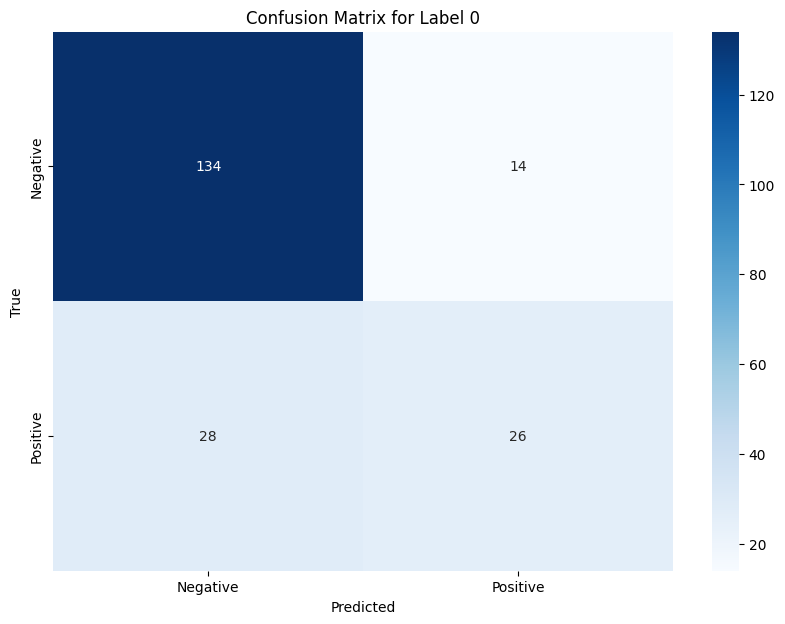

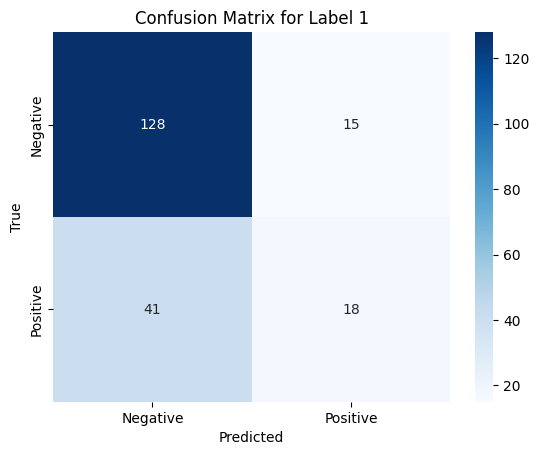

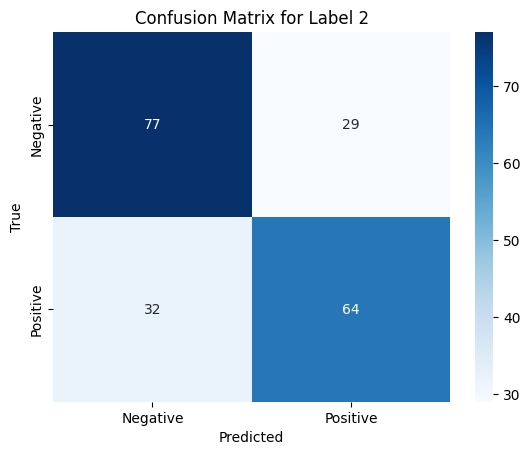

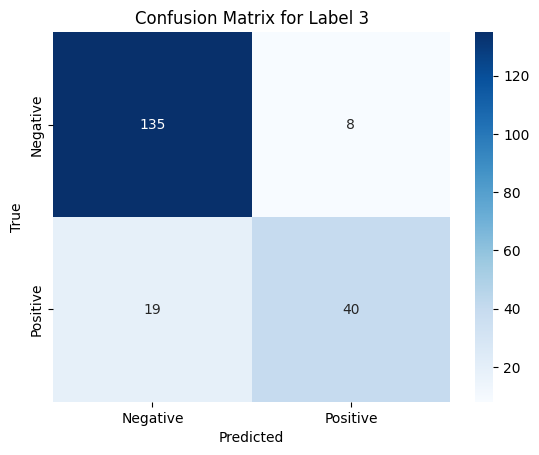

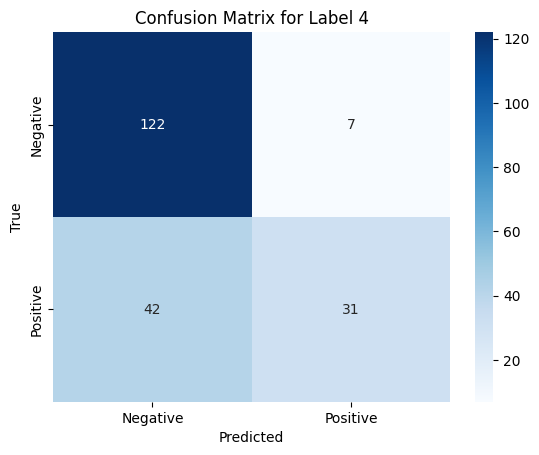

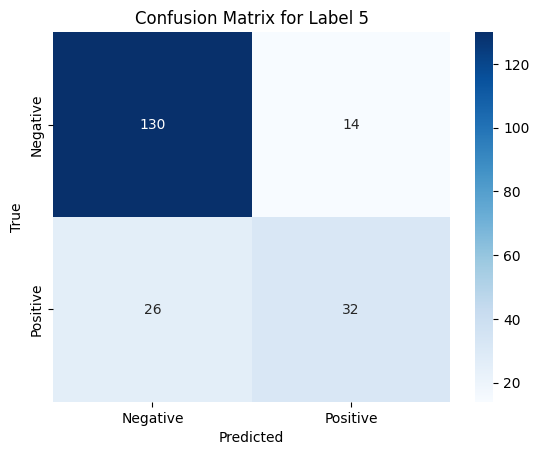

In [108]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

mcm = multilabel_confusion_matrix(y_test_df.values, y_pred_df.values)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
for i, cm in enumerate(mcm):
    labels = ['Negative', 'Positive']  # Assuming binary classification for each label
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for Label {i}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [109]:
from sklearn.metrics import classification_report

print(classification_report(y_test_df, y_pred,target_names=columns))

                 precision    recall  f1-score   support

amazed-suprised       0.65      0.48      0.55        54
  happy-pleased       0.55      0.31      0.39        59
  relaxing-calm       0.69      0.67      0.68        96
    quiet-still       0.83      0.68      0.75        59
     sad-lonely       0.82      0.42      0.56        73
angry-aggresive       0.70      0.55      0.62        58

      micro avg       0.71      0.53      0.61       399
      macro avg       0.70      0.52      0.59       399
   weighted avg       0.71      0.53      0.60       399
    samples avg       0.58      0.52      0.52       399



/home/shuruyi/Documents/git/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
